# Machine Learning Workshop

<b>Joraaver Chahal
<br>30 April 2015</b>


## What is Machine Learning?

Machine learning is a type of artificial intelligence (AI) that provides computers with the ability to learn without being explicitly programmed. Machine learning focuses on the development of computer programs that can teach themselves to grow and change when exposed to new data. 

-WhatIs.com

<b>In the simplest terms, it's using the data provided to see if a machine can "learn" what kind of relationships exist within the data.</b>

## Examples of Machine Learning

Spam filter: based on the details of the incoming email (from, subject, body) should the email be delivered to 
    the inbox or classified as spam?

Facial Detection: given a database of faces, is a picture of a face already inside the database, or is it a new face?

* Not just matching faces. Depends on angle, lighting, facial hair, etc.

Sound source separation: given an audio stream, is it possible to separate different sound sources? 

Species analysis: given lots of samples of lengths of different bones , do the bones belong to different species, or are they all of the same species?

Many more!

## The Setup

### Current environment:

Python: 2.7.6 </br>
IPython: 3.1.1 </br>
scikit-learn: 0.16.1 </br>

scikit-learn installation: [http://scikit-learn.org/stable/install.html](http://scikit-learn.org/stable/install.html)

# Diving in

## Types of Machine Learning

#### Supervised Learning

* Building a spam filter when given previous emails that are labeled spam/email

#### Unsupervised Learning

* Distinguishing different species given lots of samples of lengths of different bones, without prior 
knowledge of different species' bone lengths.

## What separates the two kinds of learning?

<span style ="font-size: 1.2em">Supervised learning can be done when the <b>data provided already has labels</b> attached to each sample.</span> <br>


* In the spam filter example, each sample is an email that arrives at the server, and the label is whether it is spam, or is not spam. To express that as an integer requires simple binary mapping: 1 is spam, 0 is not spam

<span style ="font-size: 1.2em">Used for <b>predicting</b> the label of a new sample or data point</span>

<span style ="font-size: 1.2em">Unsupervised learning is done when the <b>data is completely unlabeled</b></span>


* In the species analysis example, all the samples come with no species attached. 
* The question then isn't what species is each sample, but does the sample define a distinct species, or is it too similiar to other samples?

<span style ="font-size: 1.2em">Used for <b>finding</b> some kind of grouping for the samples </span>

# Supervised Learning

Two types: <b>Classification</b> and <b>Regression</b>

## Classification

Load up the iris dataset!

In [59]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']


iris is now a dictionary of key value terms. What are its <b>labels</b>?

In [60]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


What are its <b>features</b>?

In [61]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


How many samples are we working with?

In [62]:
print(iris.data.shape)

(150, 4)


### Classifying a New Sample

First, let's look at the data space:

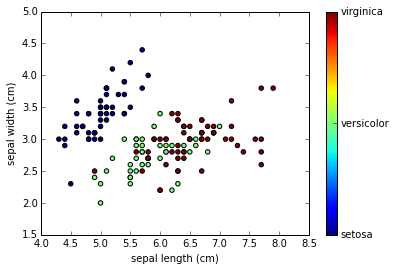

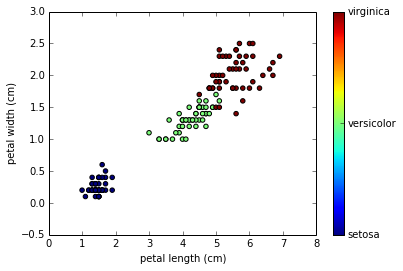

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = iris.target

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(1)
plt.scatter(iris.data[:,0], iris.data[:,1],c=y)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.figure(2)
plt.scatter(iris.data[:,2], iris.data[:,3],c=y)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

Suppose this is the new sample:

In [64]:
unknown = [7.5,3,6,2.5]

We are now going to take <b>choose a model</b>, <b>fit it</b> to the data, and <b>predict the label</b> of this unknown sample.

In [65]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(iris.data,iris.target)
print iris.target_names[model.predict(unknown)]

['virginica']


In [66]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(iris.data,iris.target)
print iris.target_names[model.predict(unknown)]


['virginica']


But suppose the unknown class is now this:

In [67]:
unknown = [7.5,3,4,2.5]

In [68]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(iris.data,iris.target)
print(iris.target_names[model.predict(unknown)])
print(model.score(iris.data,iris.target))


['virginica']
1.0


In [69]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(iris.data,iris.target)
print iris.target_names[model.predict(unknown)]
print(model.score(iris.data,iris.target))


['versicolor']
0.966666666667


### Linear Regression works along the same principles!

The only difference is that the target label is a <b>continuous</b> variable

* Dataset is just a pair of x and y values (simplest example).
* Given a new x, what would be the predicted y?


## Key Points in Supervised Learning

Just remember, with supervised learning, the steps are:

1. Pick a model

2. Fit the model

3. Score the model (to check how well it does)

3. Predict the new sample.

<b>Good Practice</b>: Check the chosen model by splitting the provided dataset into a <b>train</b> and a <b>test</b> dataset
    
1. Use the train dataset to fit your model
2. Use the test dataset to check how well you model performs

scikit-learn has a convenience method for this:

    train_test_split(X,y)
    
X is the set of samples, y is the set of labels. Returns 4 arrays: train data, test data, train labels, and test labels

# Unsupervised Learning

How important are each of the features?

How many labels or classes exist in the dataset?

## Principle Component Analysis

PCA, for short

Involves figuring out what features account for most of the variance in the dataset. 

* Matters much more for larger dimensional datasets (4+)


We'll look at the iris dataset, without knowledge of the labels!

In [70]:
from sklearn.decomposition import PCA
# inital observation suggests either petal stats or sepal stats
# Maybe only two are needed?
pca = PCA(n_components=2) 
pca.fit(iris.data)
X = pca.transform(iris.data)
X.shape

(150, 2)

What this has done is given us a new data set, with only two features instead of four.

But what are the two features?

In [71]:
print pca.components_

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]


PCA finds the best <b>combination of features</b> that explains the variance.

* Here, on the x-axis, it's petal length that determines the most variance. On the y-axis, a combination of sepal width and length matter the most.

It's not very clear from the graphs how this algorithm works; unfortunately, its out of the scope of this workshop!

## Clustering

The most generic technique for finding out how many classes exist in a dataset along with what class to assign each sample.

I'll look at <b>K-Means Clustering</b>, because it is actually quite simple to follow:

* Pick how many clusters the data set will have (or use an algorithm to calculate this number)
* Pick a sample point as a starting point for each of the clusters. Known as the center of the class.
* Data points get assigned to the closest center.
* Center readjusts based on average of all the points in its cluster.
* Repeat data point assignment until two iterations pass with no changes to points.



The transformed iris dataset will show its power!

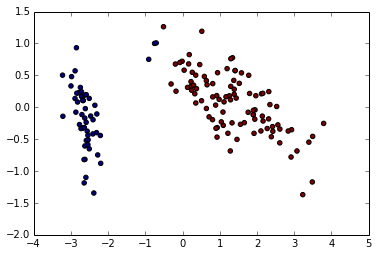

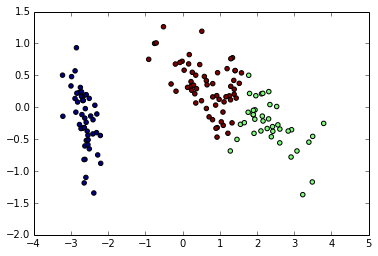

In [72]:
from sklearn.cluster import KMeans

# For demonstration puposes:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
y = kmeans.predict(X)

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y);

# Correct number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y = kmeans.predict(X)

plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], c=y);


## Key Points in Unsupervised Learning

Reduction analysis via PCA can greatly improve understanding of dataset

* What features are more important that others not only aids algorithms, but aids human understanding and insight.

Clustering is a technique used for identifiying special groupings of data points.

* Many algorithms, not just K-means, exist to cluster.

# Try this!

In [73]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=3,random_state=0)

Use the <b>KNearestNeigbhors</b> classifier to first predict the unknown point sample [0,10,10]. Then, using <b>PCA</b>, 
reduce the dataset to 2 dimensions, plot the data, and see if you classification makes sense. You may want to look at the data after you've done the classification to see what group your number classification corresponds to.

In [74]:
#print help(KNeighborsClassifier)
#print help(PCA)

[2]
[[-8.32978093  0.42838133]]


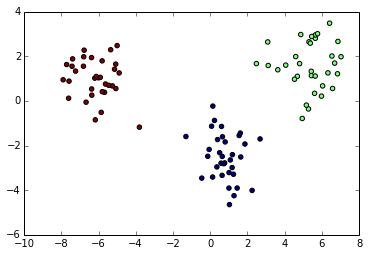

In [75]:
unknown = [0,10,10]

model= KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)

print(model.predict(unknown))

pca = PCA(n_components=2) 
pca.fit(X)
X_red = pca.transform(X)

plt.scatter(X_red[:,0],X_red[:,1],c=y)

print(pca.transform(unknown))

In [76]:
print(X_red[y==2])

[[-7.39906965  1.88102673]
 [-6.77880689  2.27146008]
 [-3.80716067 -1.17670743]
 [-5.6320046   0.75517954]
 [-6.37591394  0.53236841]
 [-7.42914872  1.55134904]
 [-6.00309076  1.03394687]
 [-4.89546587  1.25158266]
 [-5.0787956   1.64650102]
 [-5.68057214  0.38385441]
 [-6.36713545  0.2564744 ]
 [-6.17809318 -0.84986984]
 [-6.80226299  1.97622446]
 [-5.07325118  0.55391792]
 [-5.35189998  2.29126306]
 [-5.8601241  -0.51518617]
 [-7.90742628  0.94542938]
 [-6.81467407  1.55203275]
 [-5.9114468   1.05330975]
 [-5.14504461  1.41954948]
 [-6.6740214  -0.05874198]
 [-5.0056693   2.47690488]
 [-6.20551564  1.01788157]
 [-6.12448285  1.09376091]
 [-5.2569233   0.66951899]
 [-5.81207013  1.79257446]
 [-7.23923698  1.33404081]
 [-7.5909011   0.8846495 ]
 [-5.80255157  0.41081563]
 [-7.61269925  0.11869371]
 [-5.45150767  0.69650748]
 [-6.3798764   1.9395669 ]
 [-7.71920681  1.6286093 ]]


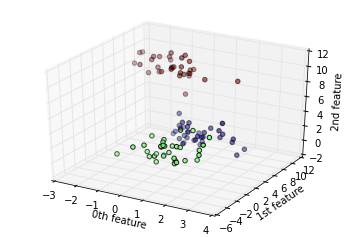

In [77]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=y)
ax.set_xlabel("0th feature")
ax.set_ylabel("1st feature")
ax.set_zlabel("2nd feature")

# Closing Remarks

### Machine learning is a vast subject. To truly learn it means the willingness to get dirty with the data and the algorithms.

Great resources:
    
   * Coursera's Machine Learning course: [https://www.coursera.org/course/ml](https://www.coursera.org/course/ml)
   * Yahoo Lab's recent Machine Learning tutorials: [http://yahoolabs.tumblr.com/post/97839313996/machine-learning-for-smart-dummies](http://yahoolabs.tumblr.com/post/97839313996/machine-learning-for-smart-dummies)
   * UCLA's Data Mining course CS 145: watch out, this class is pretty dry, but you learn A LOT about the algorithms.
   * PyCon 2015: [https://www.youtube.com/channel/UCgxzjK6GuOHVKR_08TT4hJQ/search?query=machine+learning](https://www.youtube.com/channel/UCgxzjK6GuOHVKR_08TT4hJQ/search?query=machine+learning) (pre-searched machine learning)
   * Datatau: [http://www.datatau.com/](http://www.datatau.com/). It's the Hacker News for all things data!


### That was my first ever talk with the AI club, let alone ACM in general. Thanks for your attention!